In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dataset = pd.read_csv("tmdb-movies.csv")
print(dataset.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [31]:
print(dataset.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [25]:
print(dataset.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
profit                    int64
profit_margin            object
dtype: object


In [33]:
dataset_cleaned = dataset.dropna(subset=['imdb_id', 'overview'])

In [34]:
for column in columns_to_fill:
    dataset_cleaned.loc[:, column] = dataset_cleaned[column].fillna('Unknown')

In [35]:
dataset_cleaned = dataset_cleaned.drop(columns=['homepage', 'tagline'])

In [36]:
dataset_cleaned = dataset_cleaned[(dataset_cleaned['budget'] > 0) & (dataset_cleaned['revenue'] > 0)]

In [37]:
dataset_cleaned['profit'] = dataset_cleaned['revenue'] - dataset_cleaned['budget']
dataset_cleaned['profit_margin'] = dataset_cleaned['profit'] / dataset_cleaned['budget']

In [38]:
print(dataset_cleaned.isnull().sum())

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
profit_margin           0
dtype: int64


In [40]:
dataset_cleaned['profit'] = dataset_cleaned['revenue'] - dataset_cleaned['budget']
dataset_cleaned['profit_margin'] = (dataset_cleaned['profit'] / dataset_cleaned['budget']).replace([float('inf'), -float('inf')], None)

In [41]:
summary = dataset_cleaned[['budget', 'revenue', 'profit', 'profit_margin']].describe()
summary

,budget,revenue,profit,profit_margin
count,3.855000e+03,3.855000e+03,3.855000e+03,3.855000e+03
mean,3.720183e+07,1.076589e+08,7.045710e+07,2.969639e+02
std,4.220291e+07,1.765248e+08,1.506085e+08,1.644042e+04
min,1.000000e+00,2.000000e+00,-4.139124e+08,-9.999998e-01
25%,1.000000e+07,1.357645e+07,-1.325776e+06,-1.240715e-01
50%,2.400000e+07,4.479322e+07,2.000718e+07,1.119489e+00
75%,5.000000e+07,1.241530e+08,8.168326e+07,3.210158e+00
max,4.250000e+08,2.781506e+09,2.544506e+09,1.018618e+06


In [42]:
dataset_cleaned = dataset_cleaned[(dataset_cleaned['budget'] > 0) & (dataset_cleaned['revenue'] > 0)]

print(f"Rows remaining after cleanup: {len(dataset_cleaned)}")
print(dataset_cleaned[['budget', 'revenue']].describe())

Rows remaining after cleanup: 3855
             budget       revenue
count  3.855000e+03  3.855000e+03
mean   3.720183e+07  1.076589e+08
std    4.220291e+07  1.765248e+08
min    1.000000e+00  2.000000e+00
25%    1.000000e+07  1.357645e+07
50%    2.400000e+07  4.479322e+07
75%    5.000000e+07  1.241530e+08
max    4.250000e+08  2.781506e+09


In [47]:
dataset_cleaned['profitability'] = dataset_cleaned['profit'].apply(lambda x: 'profit' if x > 0 else 'loss')
dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_margin,profitability
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,9.090192,profit
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,1.522909,profit
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,1.683984,profit
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,9.340891,profit
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,6.927628,profit


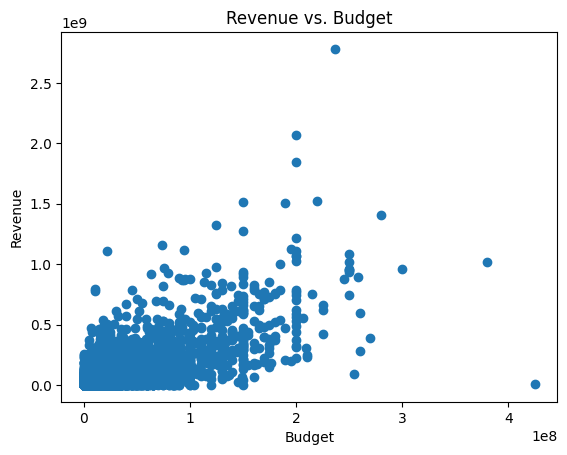

In [48]:
import matplotlib.pyplot as plt
plt.scatter(dataset['budget'], dataset['revenue'])
plt.title('Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

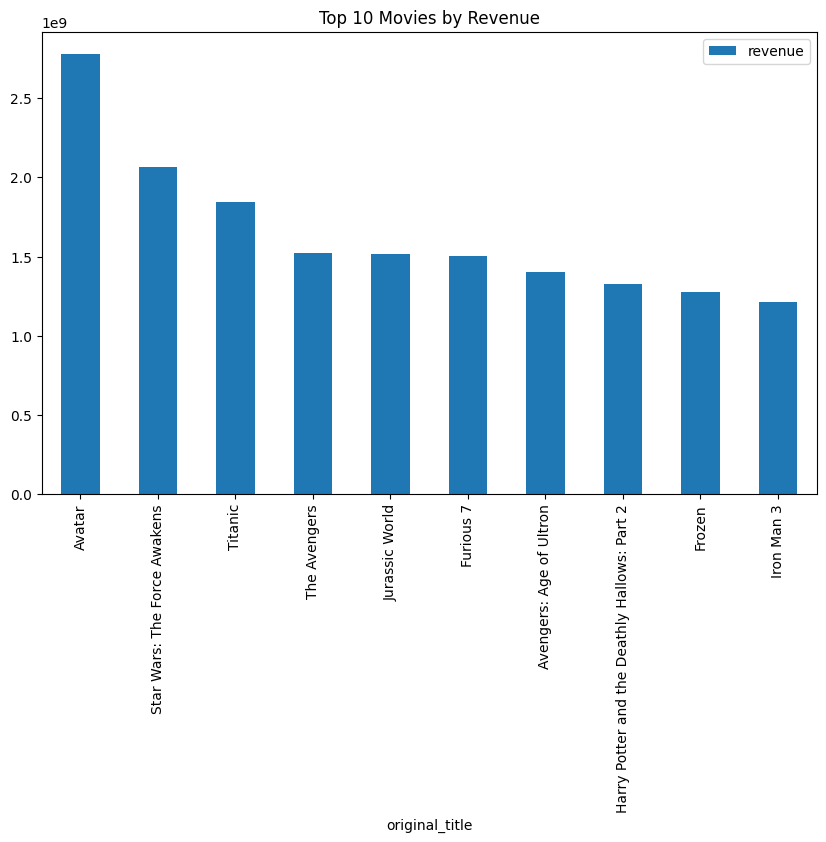

In [50]:
top_movies = dataset[['original_title', 'revenue']].nlargest(10, 'revenue')
top_movies.plot(kind='bar', x='original_title', y='revenue', title='Top 10 Movies by Revenue', figsize=(10, 6))
plt.show()


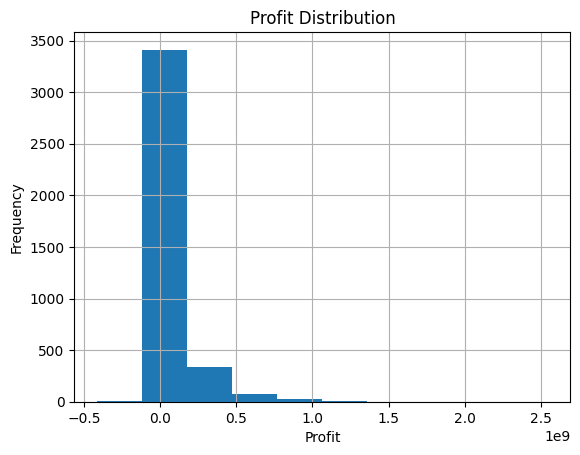

In [53]:
dataset_cleaned['profit'].hist()
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [54]:
correlation = dataset_cleaned[['budget', 'revenue']].corr()
print(correlation)

           budget   revenue
budget   1.000000  0.688548
revenue  0.688548  1.000000


In [55]:
dataset_cleaned['ROI'] = dataset_cleaned['profit'] / dataset_cleaned['budget']

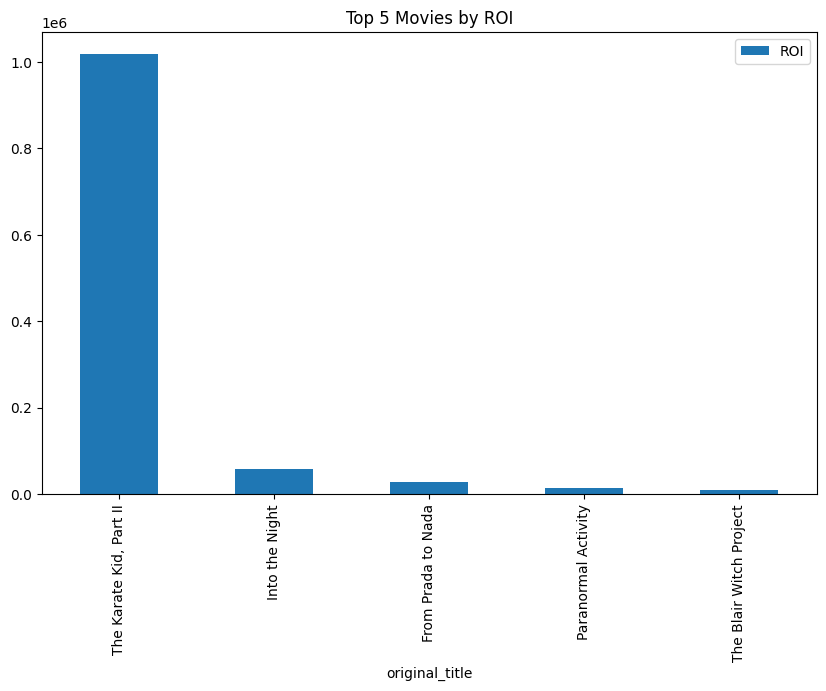

In [58]:
top_roi_movies = dataset_cleaned[['original_title', 'ROI']].nlargest(5, 'ROI')
top_roi_movies.plot(kind='bar', x='original_title', y='ROI', title='Top 5 Movies by ROI', figsize=(10,6))
plt.show()

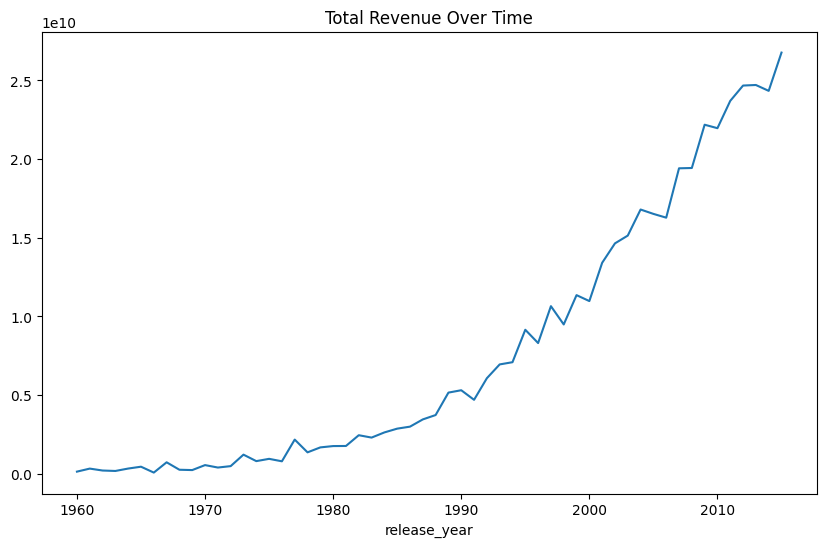

In [59]:
yearly_revenue = dataset.groupby('release_year')['revenue'].sum()
yearly_revenue.plot(kind='line', title='Total Revenue Over Time', figsize=(10,6))
plt.show()

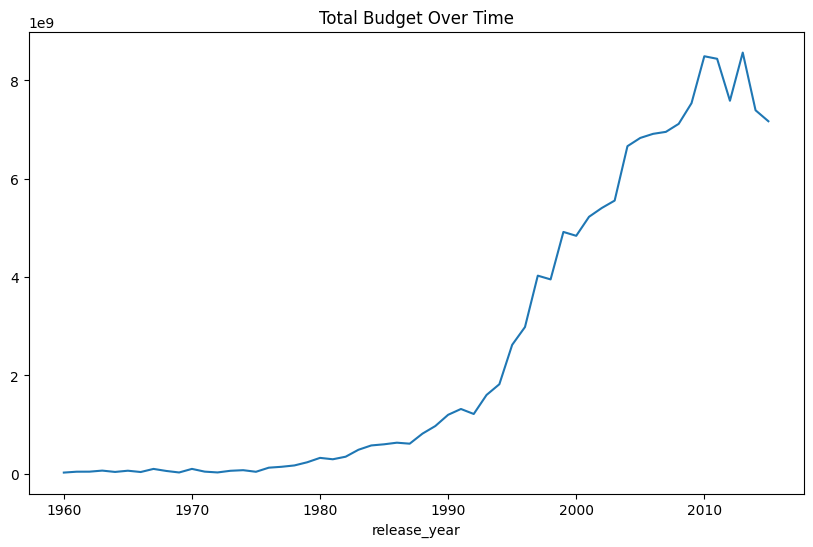

In [61]:
yearly_budget = dataset_cleaned.groupby('release_year')['budget'].sum()
yearly_budget.plot(kind='line', title='Total Budget Over Time', figsize=(10,6))
plt.show()